In [38]:
from PIL import Image, ImageOps

image = Image.open('data/original_navia.png')
image = ImageOps.fit(image, (600, 600), method=Image.LANCZOS, centering=(0.5, 0.5))
image.save('data/navia.png')
image.show()

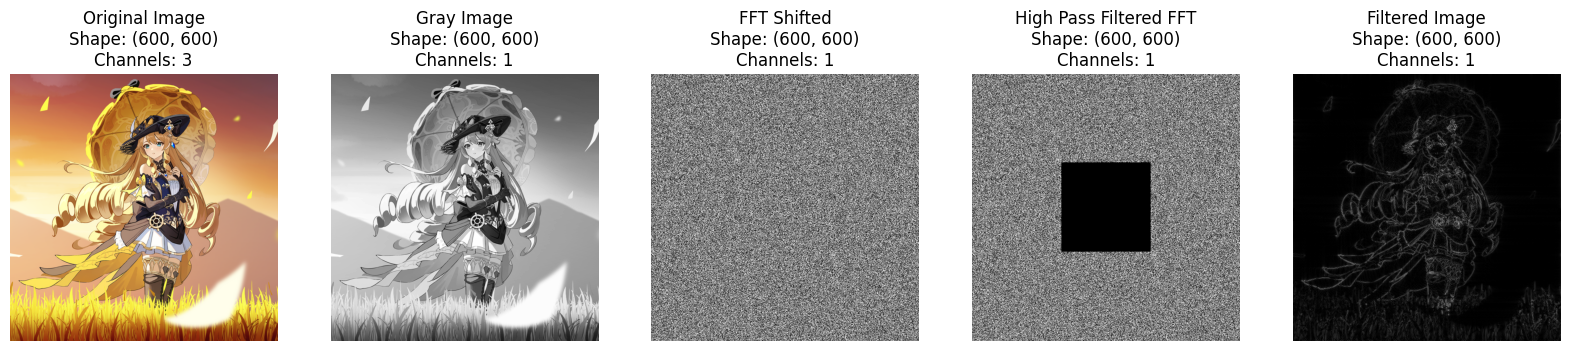

In [40]:
import numpy as np
from PIL import ImageFilter

image = Image.open("data/navia.png")
# 将图像转换为灰度图像，因为高通滤波通常在灰度图像上进行
gray_image = image.convert('L')

# 将灰度图像转换为NumPy数组，以便进行频域操作
image_array = np.array(gray_image)

# 计算图像的傅里叶变换，以便将图像从空间域转换到频域
f_transform = np.fft.fft2(image_array)

# 将傅里叶变换结果移到中心，以便更容易应用滤波器
f_transform_shifted = np.fft.fftshift(f_transform)

# 创建一个高通滤波器，滤波器的大小与图像相同
rows, cols = image_array.shape
crow, ccol = rows // 2 , cols // 2
high_pass_filter = np.ones((rows, cols), np.uint8)
r = 100  # 半径为100的低频区域将被过滤掉

# 创建正方形掩码
high_pass_filter[crow-r:crow+r, ccol-r:ccol+r] = 0

# 应用高通滤波器，将低频成分过滤掉
f_transform_filtered = f_transform_shifted * high_pass_filter

# 将傅里叶变换结果移回原位置
f_transform_filtered_shifted = np.fft.ifftshift(f_transform_filtered)

# 计算逆傅里叶变换，将图像从频域转换回空间域
image_filtered = np.fft.ifft2(f_transform_filtered_shifted)

# 取实部，因为逆傅里叶变换结果可能是复数
image_filtered = np.abs(image_filtered)

# 将结果转换回PIL图像
image_filtered = Image.fromarray(np.uint8(image_filtered))

# 显示和保存高通滤波后的图像
image_filtered.show()
image_filtered.save('data/navia_high_pass.png')
import matplotlib.pyplot as plt

# 将中间变换的图片放入列表
images = [image, gray_image, Image.fromarray(np.uint8(np.abs(f_transform_shifted))), 
          Image.fromarray(np.uint8(np.abs(f_transform_filtered))), image_filtered]

# 图片的标题
titles = ['Original Image', 'Gray Image', 'FFT Shifted', 'High Pass Filtered FFT', 'Filtered Image']

# 设置画布大小
fig, axes = plt.subplots(1, len(images), figsize=(20, 5))

# 遍历每个图片和标题，绘制到画布上
for ax, img, title in zip(axes, images, titles):
    ax.imshow(img, cmap='gray')
    ax.set_title(f'{title}\nShape: {img.size}\nChannels: {len(img.getbands())}')
    ax.axis('off')

plt.show()
# 将滤波后的灰度图像转换为RGB图像
image_filtered_rgb = Image.merge("RGB", (image_filtered, image_filtered, image_filtered))

# 显示和保存转换后的RGB图像
image_filtered_rgb.show()
image_filtered_rgb.save('data/navia_high_pass_rgb.png')


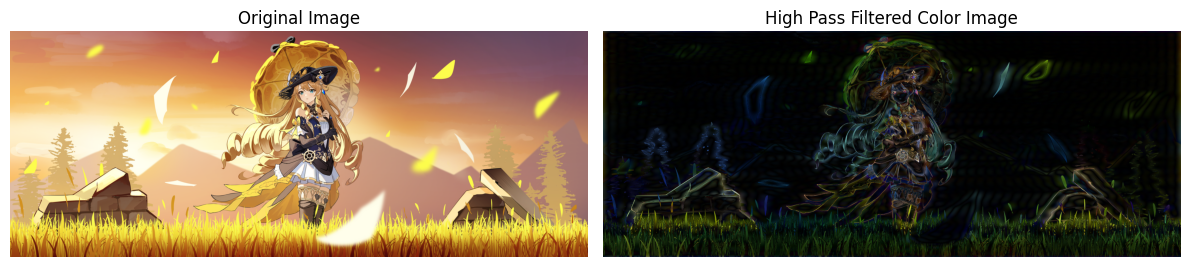

In [36]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 加载彩色图像并转换为 NumPy 数组
image = Image.open('data/original_navia.png')
image_array = np.array(image)

# 分离红、绿、蓝通道
red_channel = image_array[:, :, 0]
green_channel = image_array[:, :, 1]
blue_channel = image_array[:, :, 2]

# 定义高通滤波器函数
def high_pass_filter(channel, radius):
    # 对单个通道进行傅里叶变换
    f_transform = np.fft.fft2(channel)
    # 将频谱移到中心
    f_transform_shifted = np.fft.fftshift(f_transform)
    # 创建高通滤波器掩码
    rows, cols = channel.shape
    crow, ccol = rows // 2 , cols // 2
    mask = np.ones((rows, cols), np.uint8)
    mask[crow-radius:crow+radius, ccol-radius:ccol+radius] = 0
    # 应用高通滤波器
    f_transform_filtered = f_transform_shifted * mask
    # 逆傅里叶变换回到空间域
    f_ishift = np.fft.ifftshift(f_transform_filtered)
    img_back = np.fft.ifft2(f_ishift)
    # 获取结果的幅值
    img_back = np.abs(img_back)
    # 归一化到 0-255 范围
    img_back = (img_back - np.min(img_back)) / (np.max(img_back) - np.min(img_back)) * 255
    return img_back.astype(np.uint8)

# 设置高通滤波器的半径
radius = 30  # 根据需要调整半径大小

# 对每个通道应用高通滤波器
red_filtered = high_pass_filter(red_channel, radius)
green_filtered = high_pass_filter(green_channel, radius)
blue_filtered = high_pass_filter(blue_channel, radius)

# 合并处理后的通道
filtered_image_array = np.stack((red_filtered, green_filtered, blue_filtered), axis=2)

# 将 NumPy 数组转换为图像
filtered_image = Image.fromarray(filtered_image_array)

# 显示并保存处理后的图像
filtered_image.show()
filtered_image.save('data/navia_high_pass_color.png')

# 可选：对比原始图像和处理后的图像
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(filtered_image)
axes[1].set_title('High Pass Filtered Color Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()


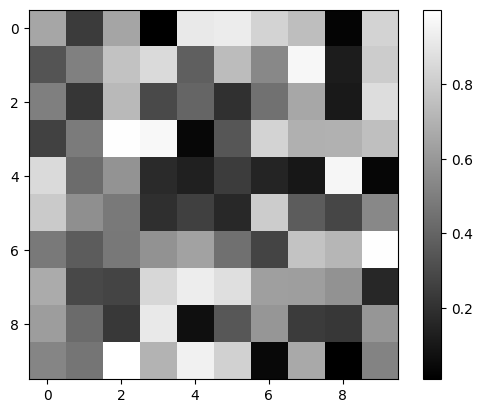

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# 生成一个随机的 10x10 数组
data = np.random.rand(10, 10)

# 使用灰度图显示数据
plt.imshow(data, cmap='gray')
plt.colorbar()
plt.show()